# Implimentation of metrics on a dummy data

In [1]:
from metrics import *
import matplotlib.pyplot as plt

In [2]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

In [3]:
tpr_fpr_df=auc_roc_curve(y_true,y_pred,thresholds)

In [4]:
tpr_fpr_df

,threshold,tpr,fpr
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


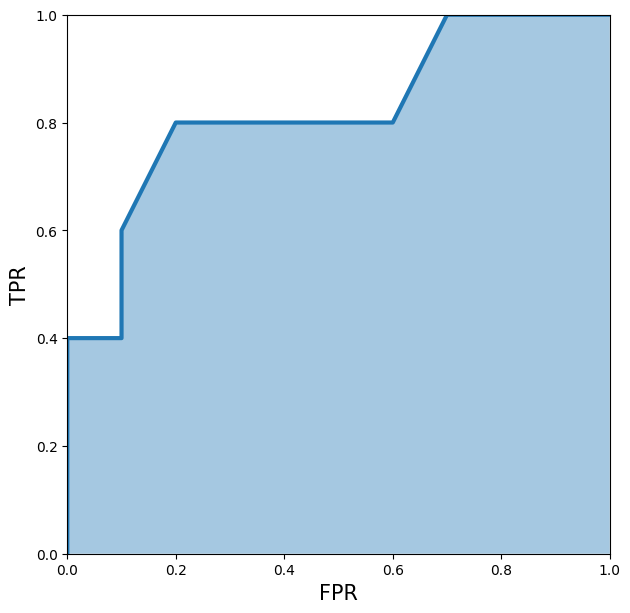

In [5]:
plt.figure(figsize = (7, 7))
plt.fill_between(tpr_fpr_df['fpr'].values, tpr_fpr_df['tpr'].values, alpha = 0.4)
plt.plot(tpr_fpr_df['fpr'].values, tpr_fpr_df['tpr'].values, lw=3)
plt.xlim(0, 1.0)
plt.ylim(0, 1.0)
plt.xlabel('FPR', fontsize= 15)
plt.ylabel('TPR', fontsize = 15)
plt.show()

Best Threshold would be 0.8 which is the left-most point

### Impact of thresholds on true positive and true negative

In [6]:
# Impact of thresholds on true positive and true negative

tp_list=[]
fp_list =[]

for thresh in thresholds:
    temp_pred = [1 if x>=thresh else 0 for x in y_pred]

    #TP
    temp_tp = true_positive(y_true=y_true, y_pred=y_pred)

    #FP
    temp_fp = false_positive(y_true=y_true, y_pred=y_pred)

    tp_list.append(temp_tp)
    fp_list.append(temp_fp)

In [7]:
tp_fp_df =pd.DataFrame({'threshold':thresholds, 'tp':tp_list,'fp':fp_list})

In [8]:
tp_fp_df

,threshold,tp,fp
0,0.00,0,0
1,0.10,0,0
2,0.20,0,0
3,0.30,0,0
4,0.40,0,0
5,0.50,0,0
6,0.60,0,0
7,0.70,0,0
8,0.80,0,0
9,0.85,0,0


### Log loss

In [13]:
from sklearn import metrics

print(log_loss(y_true=y_true, y_pred= y_pred) , metrics.log_loss(y_true,y_pred) )

0.49882711861432294 0.49882711861432294


Both the values remain same, thus our implimentation of log-loss is correct.

**Note** :  
1. Log-loss penalizes more than other metrics.
2. It penalizes you for being very sure and very wrong ( incorrect/ far-off prediction)